In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Agri.csv')

In [4]:
df.head()

,N,P,K,ph,EC,S,Cu,Fe,Mn,Zn,B,label
0,143,69,217,5.9,0.58,0.23,10.20,116.35,59.96,54.85,21.29,pomegranate
1,170,36,216,5.9,0.15,0.28,15.69,114.20,56.87,31.28,28.62,pomegranate
2,158,66,219,6.8,0.34,0.20,15.29,65.87,51.81,57.12,27.59,pomegranate
3,133,45,207,6.4,0.94,0.21,8.48,103.10,43.81,68.50,47.29,pomegranate
4,132,48,218,6.7,0.54,0.19,5.59,63.40,56.40,46.71,31.04,pomegranate


In [5]:
df.tail()

,N,P,K,ph,EC,S,Cu,Fe,Mn,Zn,B,label
615,41,23,135,5.0,1.67,0.10655,26.0,39.2,206.89,31.09,20.64,potato
616,49,45,90,5.8,1.98,0.09229,19.0,40.2,91.12,32.68,14.91,potato
617,131,24,121,4.9,2.24,0.08775,22.0,40.0,94.34,24.93,23.74,potato
618,131,55,130,5.3,2.48,0.08983,15.0,41.0,92.58,45.73,21.48,potato
619,129,34,160,4.8,1.08,0.08869,25.0,39.0,259.93,33.49,14.16,potato


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       620 non-null    int64  
 1   P       620 non-null    int64  
 2   K       620 non-null    int64  
 3   ph      620 non-null    float64
 4   EC      620 non-null    float64
 5   S       620 non-null    float64
 6   Cu      620 non-null    float64
 7   Fe      620 non-null    float64
 8   Mn      620 non-null    float64
 9   Zn      620 non-null    float64
 10  B       620 non-null    float64
 11  label   620 non-null    object 
dtypes: float64(8), int64(3), object(1)
memory usage: 58.2+ KB


In [7]:
df.describe()

,N,P,K,ph,EC,S,Cu,Fe,Mn,Zn,B
count,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000
mean,135.701613,52.508065,161.401613,6.106290,0.885468,0.484085,17.315452,117.212500,219.905887,34.340839,28.750710
std,31.808083,24.673538,81.285780,0.693782,0.637214,5.775388,6.441150,62.775199,341.998793,11.543871,19.636447
min,30.000000,10.000000,51.000000,4.500000,0.010000,0.011100,0.180000,3.810000,20.580000,17.990000,1.020000
25%,116.000000,30.000000,89.000000,5.700000,0.297500,0.086000,12.592500,68.312500,58.785000,24.727500,13.442500
50%,138.000000,54.000000,157.500000,6.100000,0.780000,0.168000,16.910000,108.245000,73.580000,31.425000,23.225000
75%,160.000000,75.000000,206.000000,6.500000,1.390000,0.240000,21.102500,155.620000,163.665000,43.542500,42.767500
max,198.000000,100.000000,369.000000,8.000000,2.480000,113.200000,35.000000,276.720000,1572.540000,70.000000,74.560000


In [8]:
df.isnull().sum()

,0
N,0
P,0
K,0
ph,0
EC,0
S,0
Cu,0
Fe,0
Mn,0
Zn,0


In [9]:
mean_values = df[['N', 'P', 'K']].mean()
print("\nMean values of N, P, and K:")
print(mean_values)


Mean values of N, P, and K:
N    135.701613
P     52.508065
K    161.401613
dtype: float64


The mean values for N, P, and K are calculated because these nutrients are primary macronutrients essential for crop growth, influencing soil fertility and plant health significantly. Understanding their average levels provides a baseline for assessing nutrient availability and identifying potential deficiencies in the soil. This analysis helps prioritize recommendations for nutrient supplementation or crop suitability.



1. **Nitrogen (N):** The mean value of 135.7 suggests a moderate level of nitrogen, essential for vegetative growth and leaf development.  
2. **Phosphorus (P):** A mean value of 52.5 indicates relatively lower phosphorus levels, critical for root development and energy transfer.  
3. **Potassium (K):** The high mean value of 161.4 highlights sufficient potassium availability, important for overall plant health and resistance to stress.  

In [10]:
df['N_percent'] = (df['N'] / (df['N'] + df['P'] + df['K'])) * 100
df['P_percent'] = (df['P'] / (df['N'] + df['P'] + df['K'])) * 100
df['K_percent'] = (df['K'] / (df['N'] + df['P'] + df['K'])) * 100
print(df[['N_percent', 'P_percent', 'K_percent']].head())

   N_percent  P_percent  K_percent
0  33.333333  16.083916  50.582751
1  40.284360   8.530806  51.184834
2  35.665914  14.898420  49.435666
3  34.545455  11.688312  53.766234
4  33.165829  12.060302  54.773869


The table provides insights into the relative nutrient composition of soil, which can guide agricultural decision-making. From the example, potassium (\(K_{\%}\)) tends to dominate the nutrient profile, accounting for over 50% in most cases, indicating its critical role in crop support for these soils. Nitrogen (\(N_{\%}\)) generally contributes around 30–40%, essential for plant growth and leaf development. Phosphorus (\(P_{\%}\)) shows the lowest percentage (typically below 20%), highlighting potential phosphorus deficiency that may require supplementation. This nutrient balance suggests that crops requiring high potassium are well-suited, but careful management of nitrogen and phosphorus levels is necessary for optimal yield. The variation in percentages across rows reflects the diversity of soil conditions in the dataset, emphasizing the need for crop-specific nutrient recommendations.

In [11]:
df['label'].unique()

array(['pomegranate', 'mango', 'grapes', 'mulberry', 'ragi', 'potato'],
      dtype=object)

In [12]:
df['label'].value_counts()

,count
label,
pomegranate,104
mango,104
grapes,104
mulberry,104
ragi,104
potato,100


In [13]:
# Maximum Nitrogen Level
df['N'].max()

198

In [14]:
# Minimum Nitrogen Level
df['N'].min()

30

In [15]:
# Maximum Phosphorus Level
df['P'].max()

100

In [16]:
# Minimum Phosphorus Level
df['P'].min()

10

In [17]:
# Maximum Potassium Level
df['K'].max()

369

In [18]:
# Minimum Potassium Level
df['K'].min()

51

In [19]:
# Extract rows where N > 150
high_nitrogen = df[df['N'] > 150]
high_nitrogen.head()

,N,P,K,ph,EC,S,Cu,Fe,Mn,Zn,B,label,N_percent,P_percent,K_percent
1,170,36,216,5.9,0.15,0.28,15.69,114.20,56.87,31.28,28.62,pomegranate,40.284360,8.530806,51.184834
2,158,66,219,6.8,0.34,0.20,15.29,65.87,51.81,57.12,27.59,pomegranate,35.665914,14.898420,49.435666
6,173,62,194,6.3,0.42,0.16,5.90,106.01,47.26,38.41,14.54,pomegranate,40.326340,14.452214,45.221445
7,152,56,218,6.4,0.37,0.27,14.24,107.55,40.80,65.93,14.53,pomegranate,35.680751,13.145540,51.173709
13,179,47,213,6.5,0.67,0.25,18.60,68.08,24.23,37.01,33.52,pomegranate,40.774487,10.706150,48.519362


In [20]:
avg_nutrients = df.groupby('label')[['N', 'P', 'K']].mean()
avg_nutrients.head()

,N,P,K
label,,,
grapes,139.817308,47.509615,83.730769
mango,114.740385,78.163462,157.461538
mulberry,144.413462,21.355769,86.000000
pomegranate,153.076923,48.740385,193.105769
potato,108.880000,44.270000,152.220000


This table reveals the unique nutrient requirements for different crops:

1. **Grapes**: Have moderate needs for Nitrogen (N) and Potassium (K) with relatively low Phosphorus (P) requirements, indicating a balanced nutrient preference.  
2. **Mango**: Requires a high level of Potassium (K) compared to Nitrogen (N) and Phosphorus (P), suggesting it grows best in Potassium-rich soils.  
3. **Mulberry**: Thrives in soils with high Nitrogen (N) and very low Phosphorus (P), indicating its preference for nitrogen-rich environments.  
4. **Pomegranate**: Needs the highest levels of Potassium (K) and substantial Nitrogen (N), highlighting its reliance on soils rich in these nutrients.  
5. **Potato**: Shows a balanced nutrient demand, with moderate Nitrogen (N), Phosphorus (P), and high Potassium (K), reflecting its versatility in nutrient-rich soils.


In [21]:
median_nutrients = df.groupby('label')[['N', 'P', 'K']].median()
print(median_nutrients)

                 N     P      K
label                          
grapes       142.0  47.0   81.0
mango        116.0  80.0  159.0
mulberry     145.0  20.0   82.0
pomegranate  153.0  51.0  194.0
potato       109.5  40.5  151.0
ragi         150.0  76.5  300.0


In [22]:
df['Total_Nutrients'] = df['N'] + df['P'] + df['K']
print("Top 5 rows with Total Nutrients added:")
print(df[['N', 'P', 'K', 'Total_Nutrients']].head())

Top 5 rows with Total Nutrients added:
     N   P    K  Total_Nutrients
0  143  69  217              429
1  170  36  216              422
2  158  66  219              443
3  133  45  207              385
4  132  48  218              398


This would help in ascertaining which of the soil samples have the highest or lowest overall nutrient content and, thus, fertility. We can then make a comparison of the total nutrient values for the various crops to find out which type of crops normally require richer or poorer soils. This could also be used in clustering or classification models to recommend crops based on the total nutrient levels.

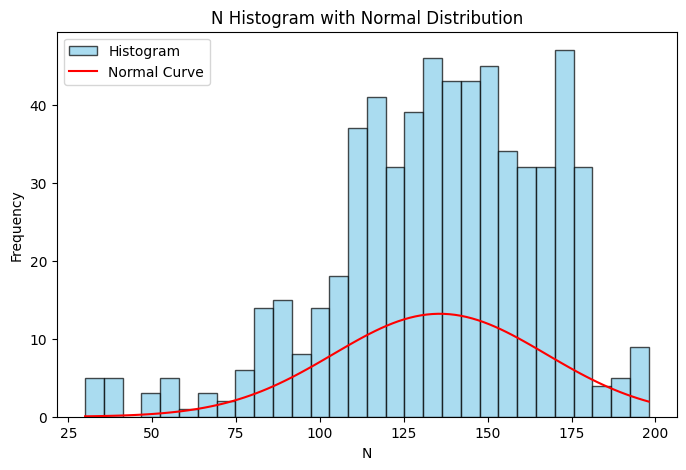

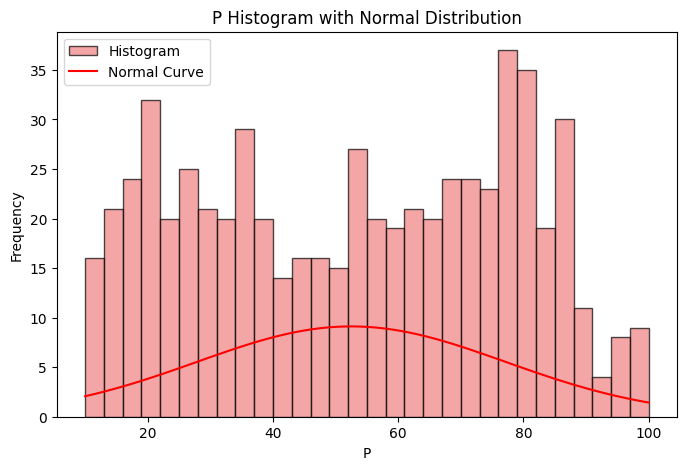

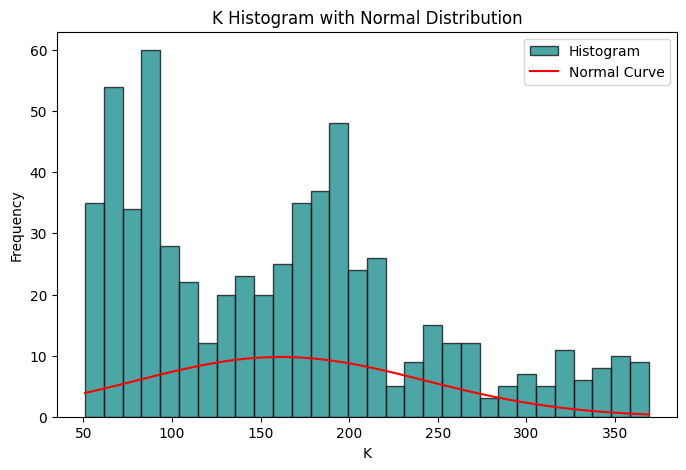

In [23]:
from scipy.stats import norm

features = ['N', 'P', 'K']
distinct_colors = ['skyblue', 'lightcoral', 'teal']

for feature, color in zip(features, distinct_colors):
    plt.figure(figsize=(8, 5))

    plt.hist(df[feature], bins=30, color=color, alpha=0.7, edgecolor='black', label='Histogram')

    mu, sigma = df[feature].mean(), df[feature].std()
    x = np.linspace(df[feature].min(), df[feature].max(), 100)
    plt.plot(x, norm.pdf(x, mu, sigma) * len(df) * (x[1] - x[0]), color='red', label='Normal Curve')

    plt.title(f'{feature} Histogram with Normal Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['label_encoded'] = le.fit_transform(df['label'])
print(df[['label', 'label_encoded']].head())

         label  label_encoded
0  pomegranate              3
1  pomegranate              3
2  pomegranate              3
3  pomegranate              3
4  pomegranate              3


In [25]:
df.head()

,N,P,K,ph,EC,S,Cu,Fe,Mn,Zn,B,label,N_percent,P_percent,K_percent,Total_Nutrients,label_encoded
0,143,69,217,5.9,0.58,0.23,10.20,116.35,59.96,54.85,21.29,pomegranate,33.333333,16.083916,50.582751,429,3
1,170,36,216,5.9,0.15,0.28,15.69,114.20,56.87,31.28,28.62,pomegranate,40.284360,8.530806,51.184834,422,3
2,158,66,219,6.8,0.34,0.20,15.29,65.87,51.81,57.12,27.59,pomegranate,35.665914,14.898420,49.435666,443,3
3,133,45,207,6.4,0.94,0.21,8.48,103.10,43.81,68.50,47.29,pomegranate,34.545455,11.688312,53.766234,385,3
4,132,48,218,6.7,0.54,0.19,5.59,63.40,56.40,46.71,31.04,pomegranate,33.165829,12.060302,54.773869,398,3


In [26]:
correlation_matrix = df.drop(columns=['label']).corr()
correlation_matrix

,N,P,K,ph,EC,S,Cu,Fe,Mn,Zn,B,N_percent,P_percent,K_percent,Total_Nutrients,label_encoded
N,1.000000,-0.065671,0.183285,0.354199,-0.301646,-0.083626,-0.017519,0.206822,0.069939,-0.026355,-0.224705,0.429617,-0.425898,-0.240936,0.427339,0.086994
P,-0.065671,1.000000,0.513214,0.042980,0.202738,-0.048939,-0.373229,-0.063169,-0.535664,0.006488,0.234306,-0.662544,0.775550,0.307663,0.609468,0.124546
K,0.183285,0.513214,1.000000,0.274853,0.363129,-0.033859,-0.198268,-0.012313,-0.412358,-0.154297,-0.316088,-0.746708,-0.058028,0.848358,0.945726,0.695740
ph,0.354199,0.042980,0.274853,1.000000,-0.306050,-0.011831,0.011482,0.438771,0.089584,-0.133763,-0.236816,0.054260,-0.229421,0.064087,0.328597,0.136530
EC,-0.301646,0.202738,0.363129,-0.306050,1.000000,0.067136,0.091337,-0.338141,-0.158526,-0.165028,-0.258056,-0.513455,0.096622,0.509882,0.236243,0.602570
S,-0.083626,-0.048939,-0.033859,-0.011831,0.067136,1.000000,-0.150109,-0.098775,-0.005194,-0.010924,-0.038572,-0.004124,-0.011234,0.010559,-0.062744,-0.023828
Cu,-0.017519,-0.373229,-0.198268,0.011482,0.091337,-0.150109,1.000000,0.208911,0.480128,-0.314798,-0.320314,0.283105,-0.318943,-0.138164,-0.245321,0.120351
Fe,0.206822,-0.063169,-0.012313,0.438771,-0.338141,-0.098775,0.208911,1.000000,0.381501,-0.351945,-0.049652,0.245945,-0.182303,-0.171033,0.038094,-0.120749
Mn,0.069939,-0.535664,-0.412358,0.089584,-0.158526,-0.005194,0.480128,0.381501,1.000000,-0.325646,-0.216797,0.548687,-0.424907,-0.371768,-0.421886,-0.102783
Zn,-0.026355,0.006488,-0.154297,-0.133763,-0.165028,-0.010924,-0.314798,-0.351945,-0.325646,1.000000,0.332802,-0.009316,0.158127,-0.074902,-0.125306,-0.241059


<Axes: >

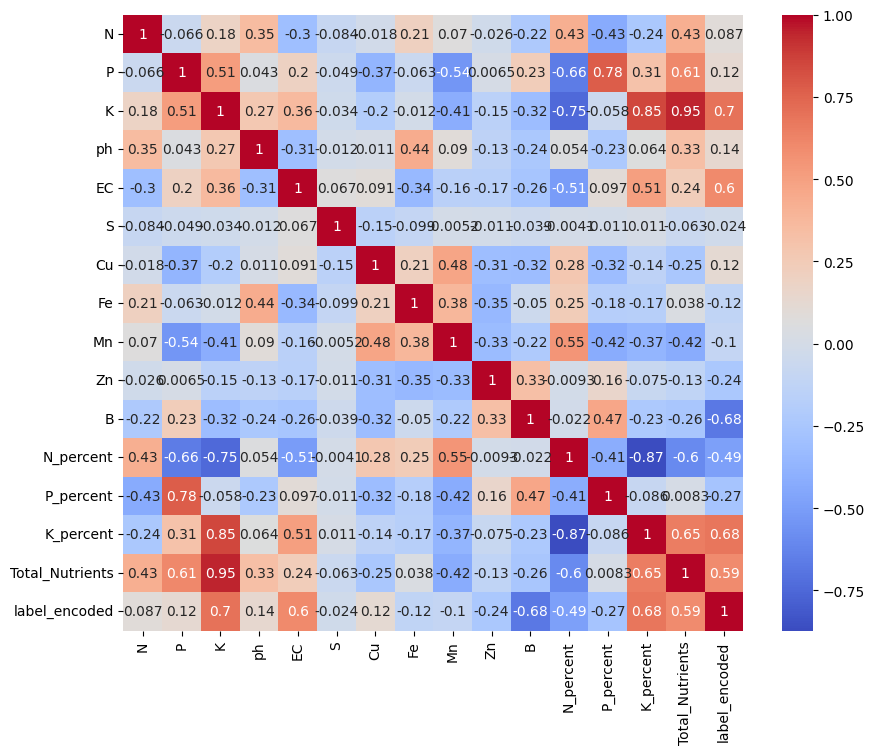

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# **Visualization**

**1) Bar Plot: Nutrient Levels per Crop**

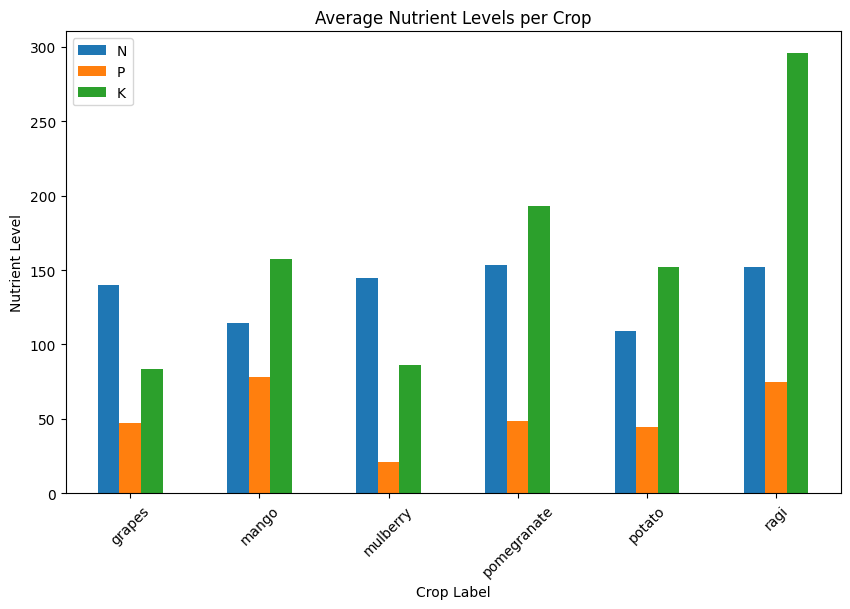

In [35]:
avg_nutrients.plot(kind='bar', figsize=(10,6))
plt.title('Average Nutrient Levels per Crop')
plt.ylabel('Nutrient Level')
plt.xlabel('Crop Label')
plt.xticks(rotation=45)
plt.show()

**2)Pie Chart: Distribution of Crops (Labels)**

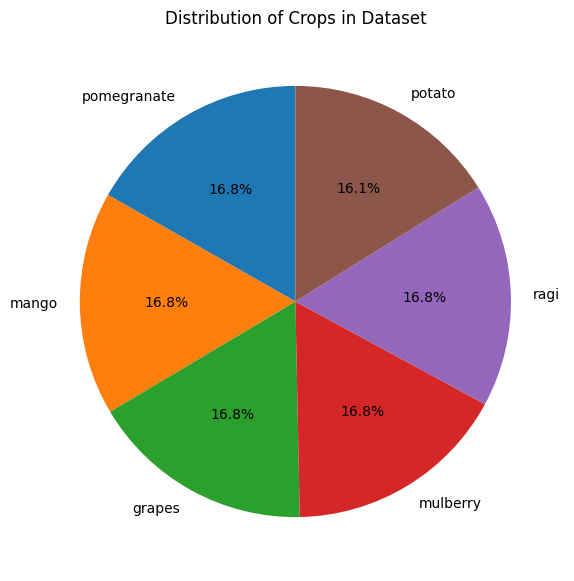

In [33]:
crop_counts = df['label'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(crop_counts, labels=crop_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Crops in Dataset')
plt.show()

**3) Pair Plot: Relationship Between Nutrients**

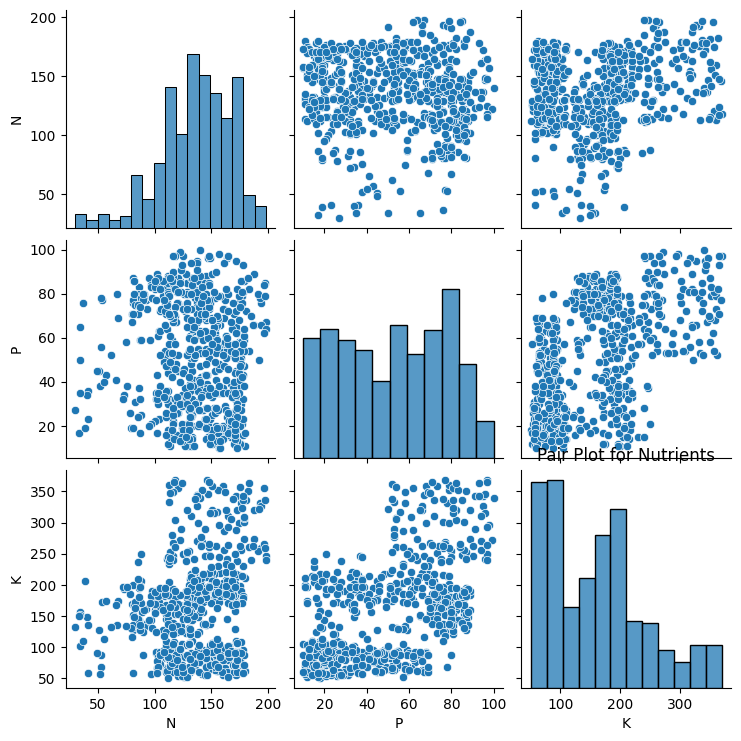

In [34]:
sns.pairplot(df[['N', 'P', 'K']])
plt.title('Pair Plot for Nutrients')
plt.show()

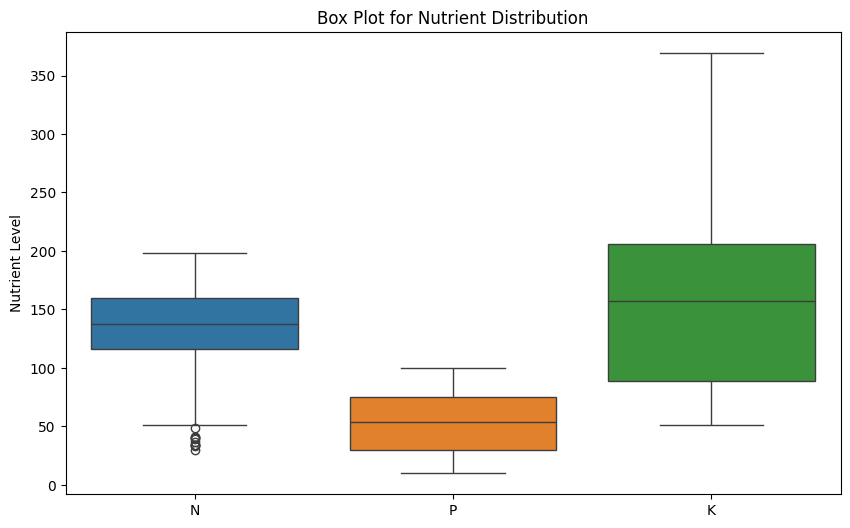

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['N', 'P', 'K']])
plt.title('Box Plot for Nutrient Distribution')
plt.ylabel('Nutrient Level')
plt.show()

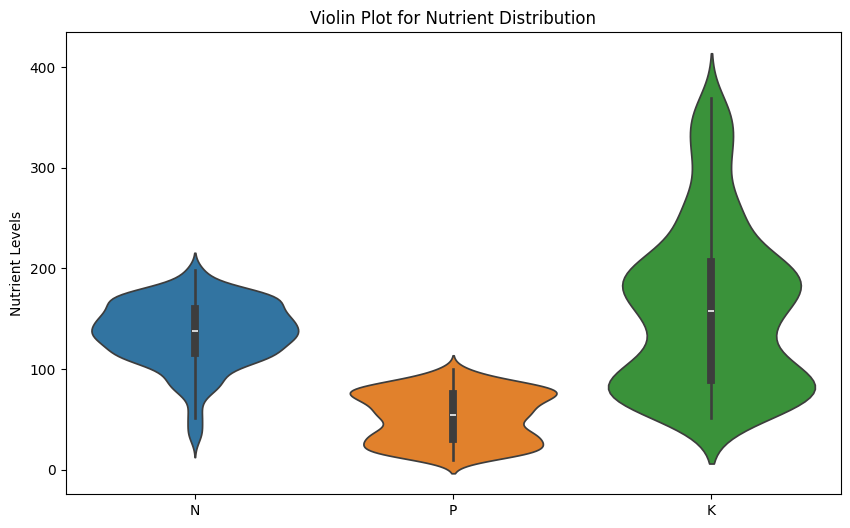

In [37]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df[['N', 'P', 'K']])
plt.title('Violin Plot for Nutrient Distribution')
plt.ylabel('Nutrient Levels')
plt.show()

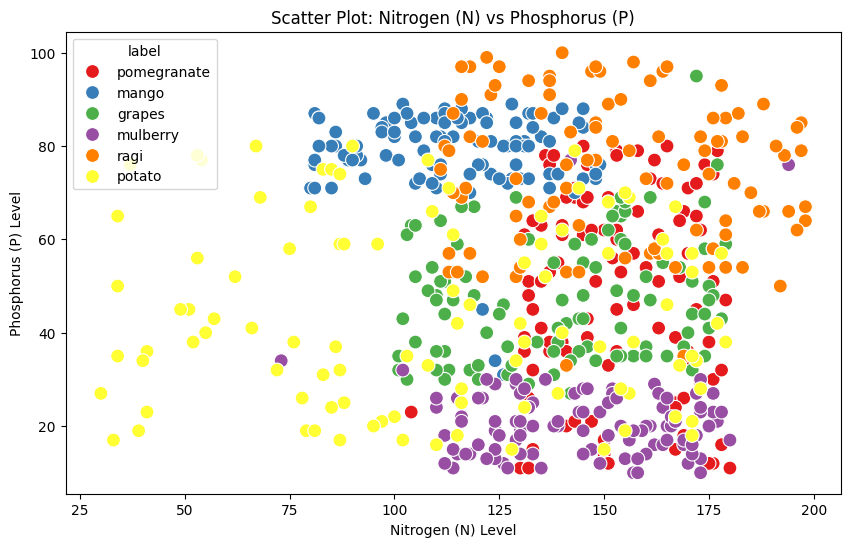

In [41]:
# Scatter plot for Nitrogen (N) vs Phosphorus (P), color-coded by crop label
plt.figure(figsize=(10,6))
sns.scatterplot(x='N', y='P', hue='label', data=df, palette='Set1', s=100, marker='o')
plt.title('Scatter Plot: Nitrogen (N) vs Phosphorus (P)')
plt.xlabel('Nitrogen (N) Level')
plt.ylabel('Phosphorus (P) Level')
plt.show()

<ipython-input-46-007ff053393e>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='label', y='N', data=df, palette='Set2')


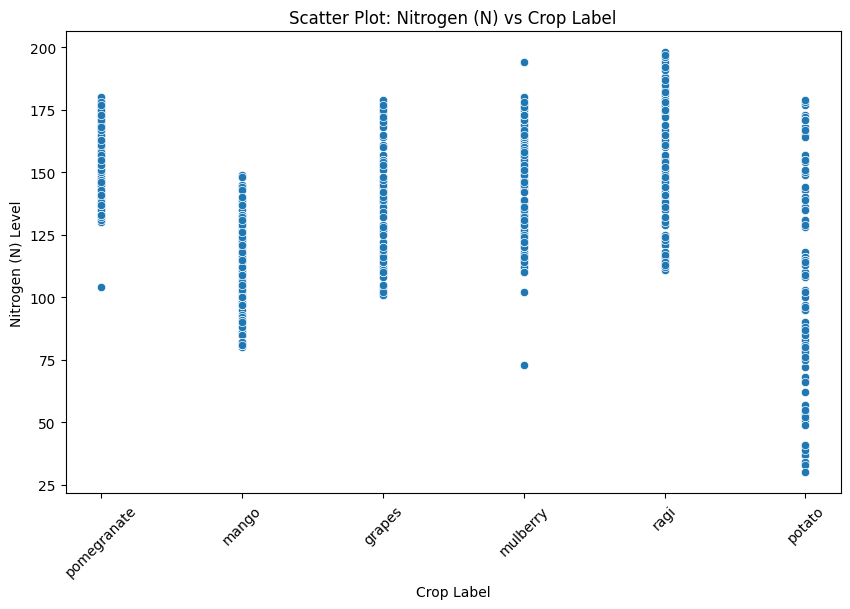

In [46]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='label', y='N', data=df, palette='Set2')
plt.title('Scatter Plot: Nitrogen (N) vs Crop Label')
plt.xlabel('Crop Label')
plt.ylabel('Nitrogen (N) Level')
plt.xticks(rotation=45)
plt.show()

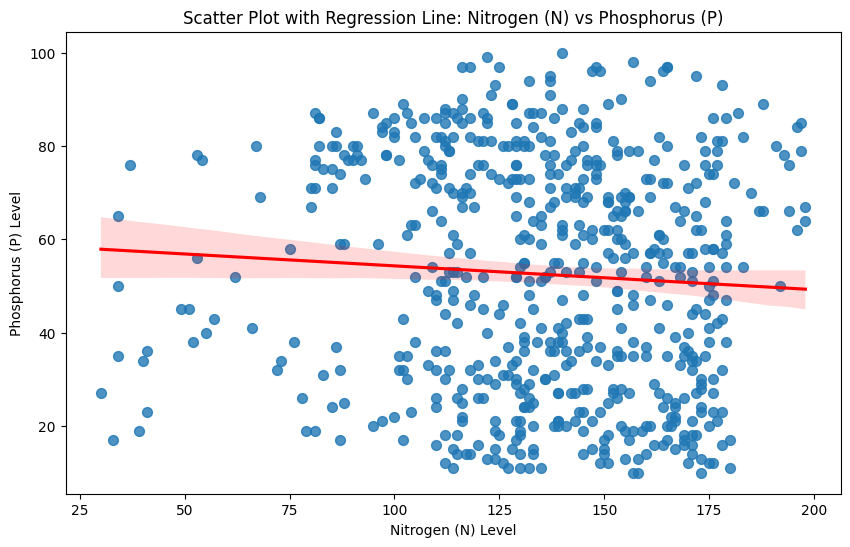

In [43]:
plt.figure(figsize=(10,6))
sns.regplot(x='N', y='P', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Scatter Plot with Regression Line: Nitrogen (N) vs Phosphorus (P)')
plt.xlabel('Nitrogen (N) Level')
plt.ylabel('Phosphorus (P) Level')
plt.show()

## **Linear Regression**

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [29]:
X = df[['N', 'P', 'K', 'ph', 'Cu', 'Fe', 'Mn', 'Zn']]  # Select relevant features
y = df['label_encoded']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
logreg = LogisticRegression(max_iter=1000)

In [32]:
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [33]:
y_pred = logreg.predict(X_test)

In [34]:
y_pred

array([3, 4, 3, 0, 3, 4, 0, 2, 2, 4, 0, 5, 0, 1, 3, 0, 4, 5, 1, 2, 2, 3,
       0, 3, 0, 4, 0, 2, 5, 4, 3, 1, 2, 3, 1, 2, 1, 2, 1, 0, 4, 5, 1, 2,
       2, 3, 0, 1, 0, 3, 0, 5, 2, 2, 4, 3, 4, 0, 5, 5, 1, 5, 4, 3, 4, 5,
       0, 0, 3, 5, 2, 2, 2, 5, 3, 2, 1, 4, 3, 4, 5, 5, 4, 3, 1, 5, 4, 3,
       1, 5, 0, 0, 2, 0, 4, 5, 5, 1, 3, 1, 4, 0, 2, 3, 0, 3, 0, 4, 2, 4,
       2, 0, 1, 2, 4, 0, 4, 0, 5, 3, 1, 1, 1, 1])

In [41]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [42]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.9193548387096774
Confusion Matrix:
[[22  1  0  0  0  1]
 [ 1 15  0  1  0  1]
 [ 0  0 21  0  0  0]
 [ 0  1  0 20  0  1]
 [ 1  1  0  0 21  0]
 [ 0  1  0  0  0 15]]


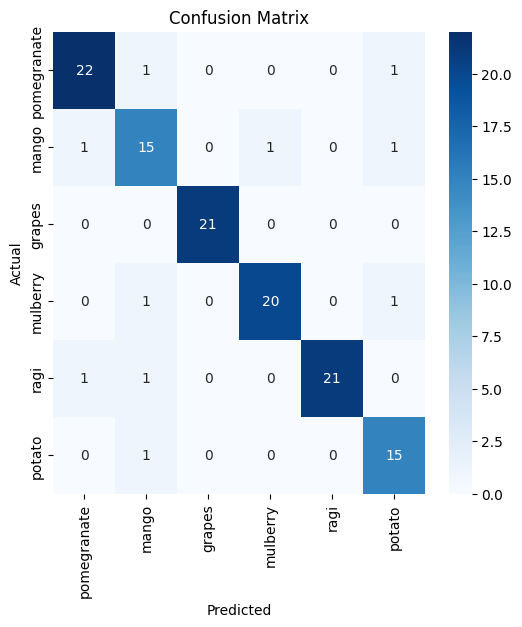

In [43]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['label'].unique(), yticklabels=df['label'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [44]:
TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP
TN = np.sum(cm) - (TP + FP + FN)

In [45]:
print(f'Therefore, the values for the following are: TP = {TP}, TN = {TN}, FP = {FP}, FN = {FN}')

Therefore, the values for the following are: TP = [22 15 21 20 21 15], TN = [ 98 102 103 101 101 105], FP = [2 4 0 1 0 3], FN = [2 3 0 2 2 1]


In [46]:
# Accuracy
accuracy = np.sum(TP) / np.sum(cm)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9193548387096774


In [48]:
# Recall
recall = TP / (TP + FN)
print(f"Recall: {recall}")

Recall: [0.91666667 0.83333333 1.         0.90909091 0.91304348 0.9375    ]


In [49]:
# Precision
precision = TP / (TP + FP)
print(f"Precision: {precision}")

Precision: [0.91666667 0.78947368 1.         0.95238095 1.         0.83333333]


In [50]:
# False Alarm Rate
farate = FP / (FP + TN)
print(f"False Alarm Rate: {farate}")

False Alarm Rate: [0.02       0.03773585 0.         0.00980392 0.         0.02777778]


In [51]:
# Specificity
spe = 1 - farate
print(f"Specificity: {spe}")

Specificity: [0.98       0.96226415 1.         0.99019608 1.         0.97222222]


In [52]:
# F1 Score
f1_sc = 2 * (precision * recall) / (precision + recall)
print(f"F1 Score: {f1_sc}")

F1 Score: [0.91666667 0.81081081 1.         0.93023256 0.95454545 0.88235294]


In [40]:
y_prob = logreg.predict_proba(X_test)
y_prob

array([[1.89231693e-02, 7.84892392e-03, 9.43131501e-03, 9.51000885e-01,
        8.09296635e-04, 1.19864098e-02],
       [2.98889909e-06, 1.27092532e-06, 3.62116245e-03, 2.01633903e-01,
        6.39761902e-01, 1.54978773e-01],
       [1.60222830e-02, 9.98235685e-03, 4.82213100e-03, 9.54028900e-01,
        1.11284210e-06, 1.51432167e-02],
       [9.13017818e-01, 1.15138528e-03, 2.37216015e-04, 8.55303915e-02,
        5.91942947e-05, 3.99512910e-06],
       [2.75617163e-02, 2.14235139e-01, 1.08139852e-03, 7.37454920e-01,
        1.61843423e-03, 1.80483913e-02],
       [5.85244514e-04, 3.15218672e-04, 1.00863793e-03, 5.24285658e-05,
        9.97914452e-01, 1.24017919e-04],
       [9.50994838e-01, 3.44736467e-02, 1.15492468e-03, 1.33035618e-02,
        1.32313292e-07, 7.28968801e-05],
       [3.40193720e-09, 4.79079882e-03, 9.95197485e-01, 8.20067913e-34,
        1.17093340e-05, 3.02087910e-09],
       [1.63037906e-02, 3.18836109e-02, 9.51498674e-01, 1.04979102e-11,
        1.09184559e-10, 

In [57]:
# Cross fold validation
from sklearn.model_selection import KFold, cross_val_score, RepeatedKFold
lr1 = LogisticRegression(solver='liblinear', max_iter=10000, random_state=42)
cv = RepeatedKFold(n_splits=5, random_state=456, n_repeats=10)
accuracy_results = cross_val_score(lr1, X, y, cv=cv, scoring='accuracy')

In [60]:
lr1

LogisticRegression(max_iter=10000, random_state=42, solver='liblinear')

In [58]:
cv

RepeatedKFold(n_repeats=10, n_splits=5, random_state=456)

In [59]:
accuracy_results

array([0.94354839, 0.94354839, 0.91935484, 0.94354839, 0.94354839,
       0.94354839, 0.88709677, 0.95967742, 0.93548387, 0.94354839,
       0.90322581, 0.89516129, 0.95967742, 0.93548387, 0.92741935,
       0.94354839, 0.91129032, 0.90322581, 0.91935484, 0.9516129 ,
       0.88709677, 0.94354839, 0.96774194, 0.92741935, 0.92741935,
       0.94354839, 0.92741935, 0.9516129 , 0.95967742, 0.90322581,
       0.91935484, 0.91129032, 0.92741935, 0.94354839, 0.96774194,
       0.93548387, 0.91935484, 0.93548387, 0.92741935, 0.95967742,
       0.93548387, 0.94354839, 0.89516129, 0.9516129 , 0.91935484,
       0.90322581, 0.94354839, 0.92741935, 0.94354839, 0.91129032])

In [61]:
mean_accuracy = accuracy_results.mean()
std_accuracy = accuracy_results.std()

print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")

Mean Accuracy: 0.9315
Standard Deviation of Accuracy: 0.0204
